# Daniel 11 Research

### The TF prelude...

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [3]:
A = use('bhsa', hoist=globals())

	connecting to online GitHub repo annotation/app-bhsa ... connected
Using TF-app in C:\Users\Oliver Glanz/text-fabric-data/annotation/app-bhsa/code:
	rv1.2=#5fdf1778d51d938bfe80b37b415e36618e50190c (latest release)
	connecting to online GitHub repo etcbc/bhsa ... connected
Using data in C:\Users\Oliver Glanz/text-fabric-data/etcbc/bhsa/tf/c:
	rv1.6=#bac4a9f5a2bbdede96ba6caea45e762fe88f88c5 (latest release)
	connecting to online GitHub repo etcbc/phono ... connected
Using data in C:\Users\Oliver Glanz/text-fabric-data/etcbc/phono/tf/c:
	r1.2 (latest release)
	connecting to online GitHub repo etcbc/parallels ... connected
Using data in C:\Users\Oliver Glanz/text-fabric-data/etcbc/parallels/tf/c:
	r1.2 (latest release)
   |     0.00s No structure info in otext, the structure part of the T-API cannot be used


# Dan 11:1
## Linguistic Challenges
### clause no01
There is an unexpected congruence between the personal pronoun (`prps`) as subject and the subject suffix (`prs`) of the predicate complement (`PreC`). Both are 1sgC.
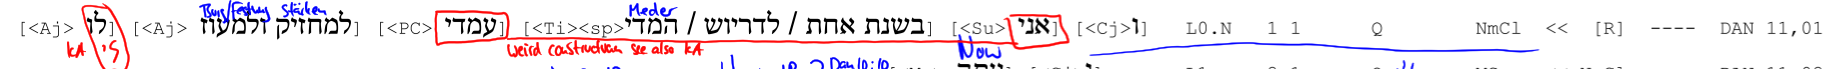

In the following query I seek to find other cases in which such a congruence takes place. 

In [4]:
CongruenceOfSubjectandPreCSuffix='''
clause
    phrase function=Subj
        w1:word sp=prps ps=p1|p2
    phrase function=PreC
        w2:word prs_ps=p1|p2|p3
w1 .ps=prs_ps. w2
'''
CongruenceOfSubjectandPreCSuffix  = A.search(CongruenceOfSubjectandPreCSuffix)
A.table(CongruenceOfSubjectandPreCSuffix, start=1, end=12, condensed=True)

XXXX (True, frozenset({'Subj'}))
XXXX (True, frozenset({'prps'}))
XXXX (True, frozenset({'p1', 'p2'}))
XXXX (True, frozenset({'PreC'}))
XXXX (True, frozenset({'p1', 'p3', 'p2'}))
  1.65s 12 results


### Results and Questions
- As can be seen the case in Dan 11:1 is exceptional and does nowhere else appear. The other 11 cases do not count as the suffix does not appear on the head of the `PreC`and is either part of a prepositional phrase or a regens-rectum construction (cf. Judges 6:15). The following query shows a more restricted query that excludes prepositional phrases and regens-rectum constructions by defining that the suffixed word needs to stand at the head of the `PreC` phrase and cannot be attached to a preposition (`prep`):

In [5]:
CongruenceOfSubjectandSubjectSuffixAtPreCHead='''
clause
    p1:phrase function=Subj
        w1:word sp=prps ps=p1|p2
    p2:phrase function=PreC
        w2:word prs_ps=p1|p2|p3 sp#prep
w1 .ps=prs_ps. w2
p2 =: w2
'''
CongruenceOfSubjectandSubjectSuffixAtPreCHead  = A.search(CongruenceOfSubjectandSubjectSuffixAtPreCHead)
A.table(CongruenceOfSubjectandSubjectSuffixAtPreCHead, start=1, end=12, condensed=True)

XXXX (True, frozenset({'Subj'}))
XXXX (True, frozenset({'prps'}))
XXXX (True, frozenset({'p1', 'p2'}))
XXXX (True, frozenset({'PreC'}))
XXXX (True, frozenset({'p1', 'p3', 'p2'}))
XXXX (False, frozenset({'prep'}))
  1.75s 1 result


n,p,verse,clause,word,phrase,phrase,word
1,Daniel 11:1,וַאֲנִי֙ בִּשְׁנַ֣ת אַחַ֔ת לְדָרְיָ֖וֶשׁ הַמָּדִ֑י עָמְדִ֛י לְמַחֲזִ֥יק וּלְמָעֹ֖וז לֹֽו׃,וַאֲנִי֙ בִּשְׁנַ֣ת אַחַ֔ת לְדָרְיָ֖וֶשׁ הַמָּדִ֑י עָמְדִ֛י לְמַחֲזִ֥יק וּלְמָעֹ֖וז לֹֽו׃,אֲנִי֙,אֲנִי֙,עָמְדִ֛י,עָמְדִ֛י


- One would expect that the the `PreC` (עֹמֶד) is actually made out of a participal form of עמד (as is done in the Syriaca: || c l עֹמֵד cf 𝔖 ||) instead of the nominal form עֹמֶד. However, the above queries also searches for participal `PreC`'s. Thus, even when changing the analysis of עֹמֶד into עֹמֵד the syntax of the first clause of Dan 11:1 would still represent an unkown grammatical construction (assuming this is classical or transitional Biblical Hebrew).
- As a potential translation one could suggest "I *am/was doing* my standing...". However, in classical/transitional Biblical Hebrew nominal clauses (`NmCl`) do not assume a *word of doing* but a *word of being*. This could have changed in late Biblical Hebrew, however. Research on this matter would be required...